In [1]:
import ceo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nLenslet = 48
nPx = 48*8+1
gs = ceo.Source('R',rays_box_size=25.5,rays_box_sampling=nPx,rays_origin=[0,0,25])
gmt = ceo.GMT_MX()
wfs = ceo.GeometricShackHartmann(nLenslet,25.5/48)
gmt.propagate(gs)
wfs.calibrate(gs,0.5)

-6.87e-11 0.883326


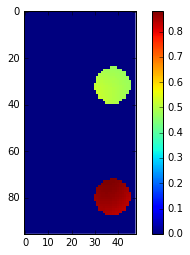

In [24]:
gmt.reset()

gmt.M1.motion_CS.euler_angles[1,0]=0.5 * ceo.constants.ARCSEC2RAD

gmt.M1.motion_CS.update()

gs.reset()

gmt.propagate(gs)

wfs.reset()

#wfs.analyze(gs)

for k in range(20):
    wfs.propagate(gs)
wfs.process()
 

 

plt.imshow(wfs.c.host(shape=((nLenslet*2,nLenslet)))*ceo.constants.RAD2ARCSEC, interpolation='None')

plt.colorbar()

print np.min(wfs.get_measurement()*ceo.constants.RAD2ARCSEC), np.max(wfs.get_measurement()*ceo.constants.RAD2ARCSEC)